In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [134]:
# Base Parameters
L = 25e7  
base_r_a1 = 1e-8
base_r_a2 = 1e-8
base_N_e = 10000
base_p_a1_0 = 0.5
G_values = np.arange(0, 51, 10)
final_g = 50
# G_values = np.arange(0, 51, 5)

In [135]:
# Updated parameter values
p_list = [0.1, 0.2, 0.3, 0.4, 0.5]
r_list = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
Ne_list = [100, 1000, 10000, 100000, 1000000]

In [136]:
def expected_switches(L, r_a1, r_a2, p_a1_0, N_e, G):
    decay_term = 1 - (1 - (1 / (2 * N_e))) ** G
    return L * (r_a1 + r_a2) * p_a1_0 * (1 - p_a1_0) * 2 * N_e * decay_term

In [137]:
# Recompute expected switches over 10 generations for each parameter set
switches_over_time_p = {
    f"$p_{{a1,0}}$={p:.1f}": [expected_switches(L, base_r_a1, base_r_a2, p, base_N_e, G) for G in G_values]
    for p in p_list
}
switches_over_time_r = {
    f"$r$={r:.0e}": [expected_switches(L, r, r, base_p_a1_0, base_N_e, G) for G in G_values]
    for r in r_list
}
switches_over_time_Ne = {
    f"$N_e$={Ne}": [expected_switches(L, base_r_a1, base_r_a2, base_p_a1_0, Ne, G) for G in G_values]
    for Ne in Ne_list
}

In [138]:
def expected_switches_lil_g(L, r_a1, r_a2, p_a1_0, N_e, g):
    decay_term = (1 - (1 / (2 * N_e))) ** g
    return L * (r_a1 + r_a2) * p_a1_0 * (1 - p_a1_0) * decay_term

In [139]:
# Recompute expected switches over 10 generations for each parameter set
switches_over_time_lil_g_p = {
    f"$p_{{a1,0}}$={p:.1f}": [expected_switches_lil_g(L, base_r_a1, base_r_a2, p, base_N_e, g) for g in G_values]
    for p in p_list
}
switches_over_time_lil_g_r = {
    f"$r$={r:.0e}": [expected_switches_lil_g(L, r, r, base_p_a1_0, base_N_e, g) for g in G_values]
    for r in r_list
}
switches_over_time_lil_g_Ne = {
    f"$N_e$={Ne}": [expected_switches_lil_g(L, base_r_a1, base_r_a2, base_p_a1_0, Ne, g) for g in G_values]
    for Ne in Ne_list
}

## Plots:

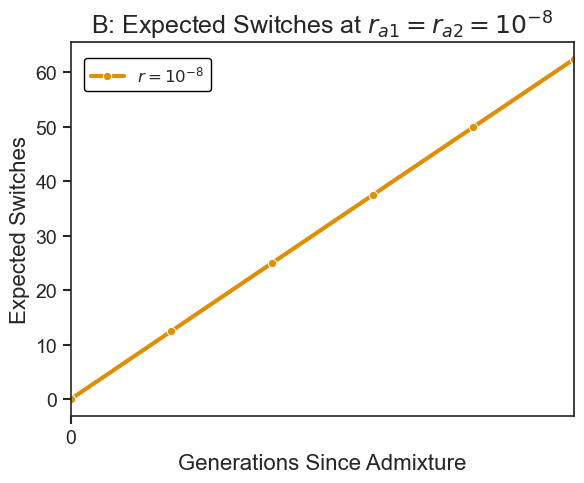

In [140]:
switches_r_1e8 = switches_over_time_r["$r$=1e-08"]

# Check lengths and fix mismatch if any
G_matched = G_values[:len(switches_r_1e8)]  # Ensure x and y are the same length

# Plot using extracted value from dictionary and fixed lengths
fig, ax = plt.subplots(figsize=(6, 5))
sns.set(style="white")

sns.lineplot(
    x=G_matched,
    y=switches_r_1e8,
    ax=ax,
    label=r"$r=10^{-8}$",
    linewidth=3,
    color="#de8f05",
    marker='o'
)

# Style formatting
ax.set_xlabel("Generations Since Admixture", fontsize=16)
ax.set_ylabel("Expected Switches", fontsize=16)
ax.set_title("B: Expected Switches at $r_{a1} = r_{a2} = 10^{-8}$", fontsize=18)
ax.set_xlim(0, final_g)
ax.set_xticks(np.arange(0, final_g+1, 100))
# ax.set_yticks(np.arange(0, 81, 10))

ax.tick_params(
    axis='both', which='major',
    direction='out', length=6, width=1.5,
    bottom=True, left=True,
    labelsize=14
)

for spine in ['left', 'bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(1.2)

ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.01, 0.98),
    fontsize=12,
    frameon=True,
    framealpha=1.0,
    edgecolor='black'
)

plt.tight_layout()
plt.show()

/var/folders/5c/nxn1ystj29n4gjk0bm30r4r80000gn/T/ipykernel_8766/3147158129.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 1])  # space for shared xlabel


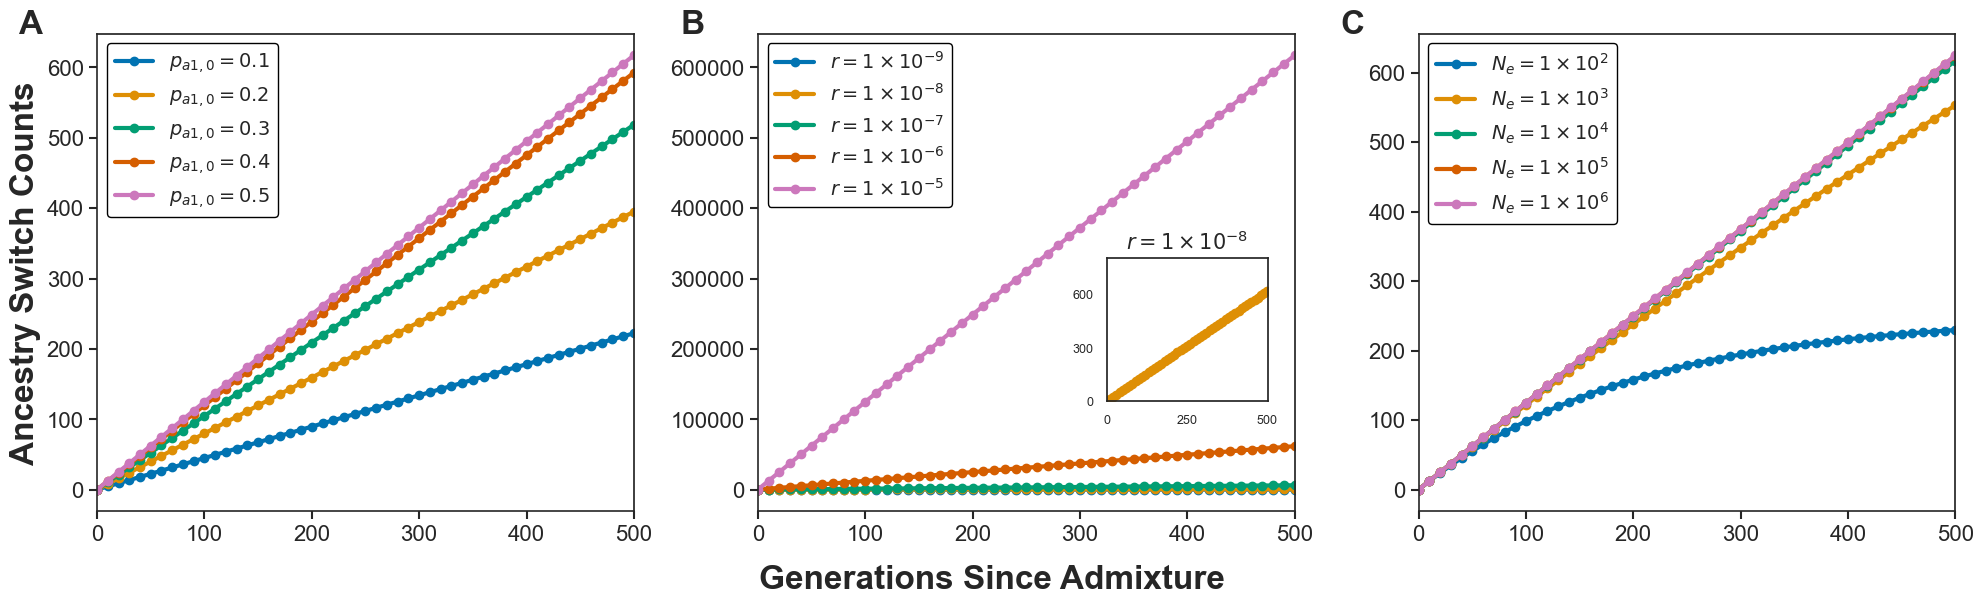

In [ ]:
# ================================================
# Imports
# ================================================
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ================================================
# Config
# ================================================
fig_path = "figures"

LABEL_FONTSIZE = 24
TICK_FONTSIZE  = 16
LEGEND_FONTSIZE = 14

sns.set_theme(style="white", palette="colorblind")
palette = sns.color_palette("colorblind")

# ================================================
# Make 3-panel plot with Panel B inset
# ================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

panel_labels = ["A", "B", "C"]

# -------------------
# Panel A: varying p
# -------------------
for idx, (label, switches) in enumerate(switches_over_time_p.items()):
    p_value = float(label.split("=")[-1])
    formatted_label = fr"$p_{{a1,0}} = {p_value}$"
    axes[0].plot(G_values, switches,
                 marker="o", linewidth=3,
                 label=formatted_label, color=palette[idx])
# axes[0].set_ylim(0, 65)
axes[0].set_ylabel("Ancestry Switch Counts",
                   fontsize=LABEL_FONTSIZE, fontweight="bold")

# -------------------
# Panel B: varying r
# -------------------
for idx, (label, switches) in enumerate(switches_over_time_r.items()):
    r_value = float(label.split('=')[-1])
    exponent = int(np.log10(r_value))
    formatted_label = fr"$r = 1 \times 10^{{{exponent}}}$"
    axes[1].plot(G_values, switches,
                 marker="o", linewidth=3,
                 label=formatted_label, color=palette[idx])
# axes[1].set_ylim(0, 65000)
# === Add Inset Axes to Panel B ===
inset_ax = inset_axes(
    axes[1], width="100%", height="100%",
    bbox_to_anchor=(0.65, 0.23, 0.3, 0.3),
    bbox_transform=axes[1].transAxes,
    borderpad=0
)
inset_ax.plot(G_matched, switches_r_1e8, color='#de8f05', marker='o', linewidth=2)
# inset_ax.set_xlim(0, 51)
inset_ax.set_xlim(0, final_g+1)
inset_ax.set_ylim(0, 801)
inset_ax.set_xticks([0, final_g/2 , final_g])
inset_ax.set_yticks([0, 300, 600])
inset_ax.set_title(r"$r= 1 \times 10^{-8}$", fontsize=15)
inset_ax.tick_params(labelsize=9)

# --------------------
# Panel C: varying Ne
# --------------------
for idx, (label, switches) in enumerate(switches_over_time_Ne.items()):
    Ne_value = int(label.split("=")[-1])
    exponent = int(np.log10(Ne_value))
    formatted_label = fr"$N_e = 1 \times 10^{{{exponent}}}$"
    axes[2].plot(G_values, switches,
                 marker="o", linewidth=3,
                 label=formatted_label, color=palette[idx])
# axes[2].set_ylim(0, 65)

# --------------------
# Formatting all panels
# --------------------
for ax, panel in zip(axes, panel_labels):
    # ax.set_xlim(0, 50)
    # ax.set_xticks(np.arange(0, 51, 10))
    ax.set_xlim(0, final_g)
    ax.set_xticks(np.arange(0, final_g+1, final_g/5))
    ax.tick_params(axis="both", which="major",
                   direction="out", length=6, width=1.5,
                   bottom=True, left=True, labelsize=TICK_FONTSIZE)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(1.2)
    ax.legend(fontsize=LEGEND_FONTSIZE, loc="upper left",
              frameon=True, framealpha=1.0, edgecolor="black")
    ax.text(-0.1, 1.05, panel, transform=ax.transAxes,
            fontsize=LABEL_FONTSIZE, fontweight="bold",
            va="top", ha="right")

# Shared x-axis label
fig.text(0.5, 0.02, "Generations Since Admixture",
         ha="center", va="center",
         fontsize=LABEL_FONTSIZE, fontweight="bold")

plt.tight_layout(rect=[0, 0.05, 1, 1])  # space for shared xlabel

plt.savefig(os.path.join(f"param_dynamics_inset_{final_g}_gen.png"), dpi=600)
plt.show()

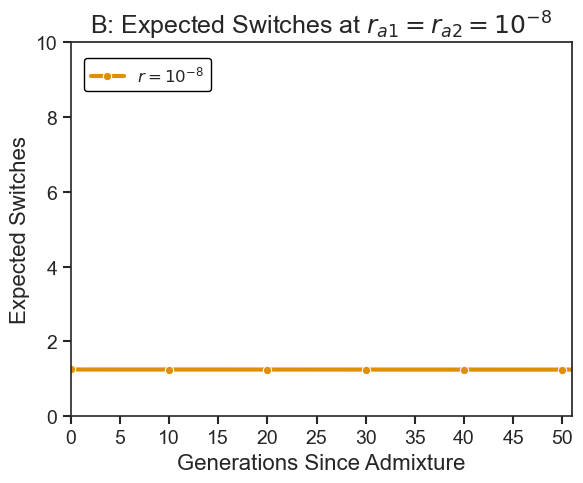

In [79]:
switches_r_1e8_lil_g = switches_over_time_lil_g_r["$r$=1e-08"]

# Check lengths and fix mismatch if any
G_matched = G_values[:len(switches_r_1e8_lil_g)]  # Ensure x and y are the same length

# Plot using extracted value from dictionary and fixed lengths
fig, ax = plt.subplots(figsize=(6, 5))
sns.set(style="white")

sns.lineplot(
    x=G_matched,
    y=switches_r_1e8_lil_g,
    ax=ax,
    label=r"$r=10^{-8}$",
    linewidth=3,
    color="#de8f05",
    marker='o'
)

# Style formatting
ax.set_xlabel("Generations Since Admixture", fontsize=16)
ax.set_ylabel("Expected Switches", fontsize=16)
ax.set_title("B: Expected Switches at $r_{a1} = r_{a2} = 10^{-8}$", fontsize=18)
# ax.set_xlim(0, 100)
# ax.set_xticks(np.arange(0, 101, 10))
ax.set_xlim(0, 51)
ax.set_xticks(np.arange(0, 51, 5))
ax.set_yticks(np.arange(0, 11, 2))

ax.tick_params(
    axis='both', which='major',
    direction='out', length=6, width=1.5,
    bottom=True, left=True,
    labelsize=14
)

for spine in ['left', 'bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(1.2)

ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.01, 0.98),
    fontsize=12,
    frameon=True,
    framealpha=1.0,
    edgecolor='black'
)

plt.tight_layout()
plt.show()

/var/folders/5c/nxn1ystj29n4gjk0bm30r4r80000gn/T/ipykernel_8766/671131566.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 1])  # space for shared xlabel


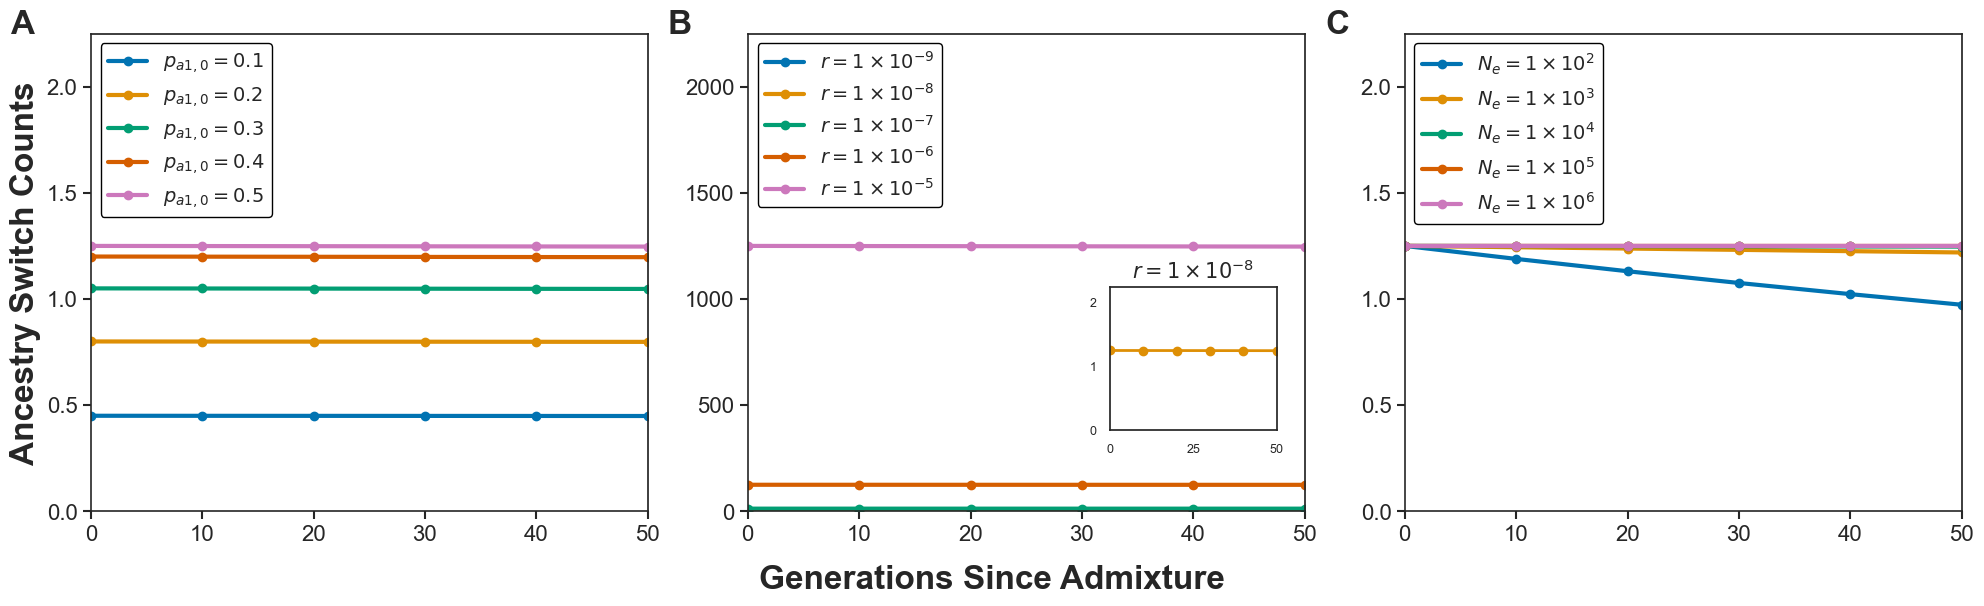

In [80]:
# ================================================
# Imports
# ================================================
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ================================================
# Config
# ================================================
fig_path = "figures"

LABEL_FONTSIZE = 24
TICK_FONTSIZE  = 16
LEGEND_FONTSIZE = 14

sns.set_theme(style="white", palette="colorblind")
palette = sns.color_palette("colorblind")

# ================================================
# Make 3-panel plot with Panel B inset
# ================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

panel_labels = ["A", "B", "C"]

# -------------------
# Panel A: varying p
# -------------------
for idx, (label, switches) in enumerate(switches_over_time_lil_g_p.items()):
    p_value = float(label.split("=")[-1])
    formatted_label = fr"$p_{{a1,0}} = {p_value}$"
    axes[0].plot(G_values, switches,
                 marker="o", linewidth=3,
                 label=formatted_label, color=palette[idx])
axes[0].set_ylim(0, 2.25)
axes[0].set_yticks([0, 0.5, 1.0, 1.5, 2.0])
axes[0].set_ylabel("Ancestry Switch Counts",
                   fontsize=LABEL_FONTSIZE, fontweight="bold")
# -------------------
# Panel B: varying r
# -------------------
for idx, (label, switches) in enumerate(switches_over_time_lil_g_r.items()):
    r_value = float(label.split('=')[-1])
    exponent = int(np.log10(r_value))
    formatted_label = fr"$r = 1 \times 10^{{{exponent}}}$"
    axes[1].plot(G_values, switches,
                 marker="o", linewidth=3,
                 label=formatted_label, color=palette[idx])
    axes[1].set_ylim(0, 2250)
    axes[1].set_yticks([0, 500, 1000, 1500, 2000])
    
# === Add Inset Axes to Panel B ===
inset_ax = inset_axes(
    axes[1], width="100%", height="100%",
    bbox_to_anchor=(0.65, 0.17, 0.3, 0.3),
    bbox_transform=axes[1].transAxes,
    borderpad=0
)
inset_ax.plot(G_matched, switches_r_1e8_lil_g, color='#de8f05', marker='o', linewidth=2)
inset_ax.set_xlim(0, 50)
inset_ax.set_ylim(0, 2.25)
inset_ax.set_xticks([0, 25, 50])
inset_ax.set_yticks([0, 1, 2])
inset_ax.set_title(r"$r= 1 \times 10^{-8}$", fontsize=15)
inset_ax.tick_params(labelsize=9)

# --------------------
# Panel C: varying Ne
# --------------------
for idx, (label, switches) in enumerate(switches_over_time_lil_g_Ne.items()):
    Ne_value = int(label.split("=")[-1])
    exponent = int(np.log10(Ne_value))
    formatted_label = fr"$N_e = 1 \times 10^{{{exponent}}}$"
    axes[2].set_ylim(0, 2.25)
    axes[2].set_yticks([0, 0.5, 1.0, 1.5, 2.0])
    axes[2].plot(G_values, switches,
                 marker="o", linewidth=3,
                 label=formatted_label, color=palette[idx])
# --------------------
# Formatting all panels
# --------------------
for ax, panel in zip(axes, panel_labels):
    ax.set_xlim(0, 50)
    ax.set_xticks(np.arange(0, 51, 10))
    ax.tick_params(axis="both", which="major",
                   direction="out", length=6, width=1.5,
                   bottom=True, left=True, labelsize=TICK_FONTSIZE)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(1.2)
    ax.legend(fontsize=LEGEND_FONTSIZE, loc="upper left",
              frameon=True, framealpha=1.0, edgecolor="black")
    ax.text(-0.1, 1.05, panel, transform=ax.transAxes,
            fontsize=LABEL_FONTSIZE, fontweight="bold",
            va="top", ha="right")

# Shared x-axis label
fig.text(0.5, 0.02, "Generations Since Admixture",
         ha="center", va="center",
         fontsize=LABEL_FONTSIZE, fontweight="bold")

plt.tight_layout(rect=[0, 0.05, 1, 1])  # space for shared xlabel

plt.savefig(os.path.join("param_dynamics_lil_g_supp.png"), dpi=600)
plt.show()